In [1]:
import numpy as np
import pandas as pd
import os.path
import cv2
import matplotlib.pyplot as plt
from os import path
import seaborn as sns

# Custom modules
from modules import voiddetect as vd
from modules import select_voidboundaries as sel
from modules import gbvoid_dataset as gbvoid
from modules import void_parameter as void_parameter

In [3]:
inputs = ['1_001', '1_002', '1_003', '1_004', '1_005', '1_006', '1_007', '1_008', '1_009', '1_010',
          '2_001', '2_002', '2_003', '2_004', '2_005', '2_006', '2_007', '2_008', '2_009',
          '3_001', '3_002', '3_003', '3_004', '3_005', '3_006', '3_007', '3_008', '3_009', '3_010',
          '4_001', '4_002', '4_003', '4_004', '4_005', '4_007', '4_008', '4_009',
          '5_001', '5_002', '5_003', '5_004', '5_005', '5_006', '5_007', '5_008', '5_009', '5_010', '5_011',
          '6_001', '6_002', '6_003', '6_004', '6_005', '6_006', '6_007', '6_008', '6_009', '6_010']

In [4]:
# Load specific sample csv dataframe
name='1_003'
o1='/home/estanislao/Documents/ML_GB/GrainLearning/output/'+name+'/df_all.csv'
o2 = '/home/estanislao/Documents/ML_GB/GrainLearning/output/' + name + '/df_selected.csv'
df_all_name = pd.read_csv(o1,index_col=0)
df_sel_name = pd.read_csv(o2,index_col=0)

In [2]:
# Load full csv dataframe

po1='/home/estanislao/Documents/ML_GB/GrainLearning/output/total_gb_df.csv'
po2 = '/home/estanislao/Documents/ML_GB/GrainLearning/output/total_sel_df.csv'

df_all = pd.read_csv(po1,index_col=0)
df_sel = pd.read_csv(po2,index_col=0)


drop_col=['phi1_right', 'PHI_right', 'phi2_right', 'phi1_left', 'PHI_left',
       'phi2_left', 'mis_x_right', 'mis_y_right',
       'mis_z_right', 'mis_x_left', 'mis_y_left', 'mis_z_left',
       'x_start', 'y_start', 'x_end', 'y_end', 'gbID_right',
       'gbID_left','x_junction','y_junction']

df_all=df_all.drop(drop_col, axis=1)
df_sel=df_sel.drop(drop_col, axis=1)

print(df_all.isnull().sum())
print('--------------------')
print(df_sel.isnull().sum())

misorientation     0
Length             0
Trace              0
Sigma              0
Distance_Center    0
Void_id            0
Rebuild_len        0
Junction           0
Prox_par           0
Void               0
Void_Parameter     0
dtype: int64
--------------------
misorientation     0
Length             0
Trace              0
Sigma              0
Distance_Center    0
Void_id            0
Rebuild_len        0
Junction           0
Prox_par           0
Void               0
Void_Parameter     0
dtype: int64


In [3]:
df_all.describe()

,misorientation,Length,Trace,Sigma,Distance_Center,Void_id,Rebuild_len,Junction,Prox_par,Void,Void_Parameter
count,193219.000000,193219.000000,193219.000000,193219.000000,193219.000000,193219.000000,193219.000000,193219.000000,193219.000000,193219.000000,193219.000000
mean,38.970197,15.822664,94.643708,5.374211,200.053157,-0.887640,-0.968427,-0.977093,-0.985035,0.011831,0.009807
std,13.736597,11.388032,56.006554,0.720107,202.458658,1.266064,0.626101,0.239452,0.139569,0.108126,0.092970
min,0.420000,1.155000,0.400000,1.016690,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,29.410000,7.024000,41.900000,5.168240,91.077445,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
50%,41.210000,13.614000,94.300000,5.698720,150.940538,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
75%,49.880000,22.030000,150.000000,5.851735,238.688226,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
max,62.670000,108.744000,180.000000,5.922240,2273.456592,34.000000,43.779976,6.000000,1.602194,1.000000,1.000000


In [4]:
# Drop negative Void Parameter
print(df_all.shape)
print()
df_all=df_all.loc[df_all['Void_Parameter'] != -1.0]
print(df_all.shape)

(193219, 11)

(193219, 11)


In [6]:
# Divide into two dataframe, void gb and no void gb
print(df_all.shape)
print(df_sel.shape)
print('Selected gb percentage:')
print((df_sel.shape[0]/df_all.shape[0])*100)


(193219, 11)
(2286, 11)
Selected gb percentage:
1.1831134619266221


In [7]:
df_no=df_all[df_all['Void']==0]
df_no.head()

,misorientation,Length,Trace,Sigma,Distance_Center,Void_id,Rebuild_len,Junction,Prox_par,Void,Void_Parameter
0,55.90,2.000,180.0,0.0,630.941584,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1,9.33,1.155,150.0,0.0,622.477160,-1.0,-1.0,-1.0,-1.0,0.0,0.0
2,32.61,1.155,30.0,0.0,603.104097,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3,7.38,1.155,30.0,0.0,574.944824,-1.0,-1.0,-1.0,-1.0,0.0,0.0
4,41.18,1.155,150.0,0.0,548.559794,-1.0,-1.0,-1.0,-1.0,0.0,0.0


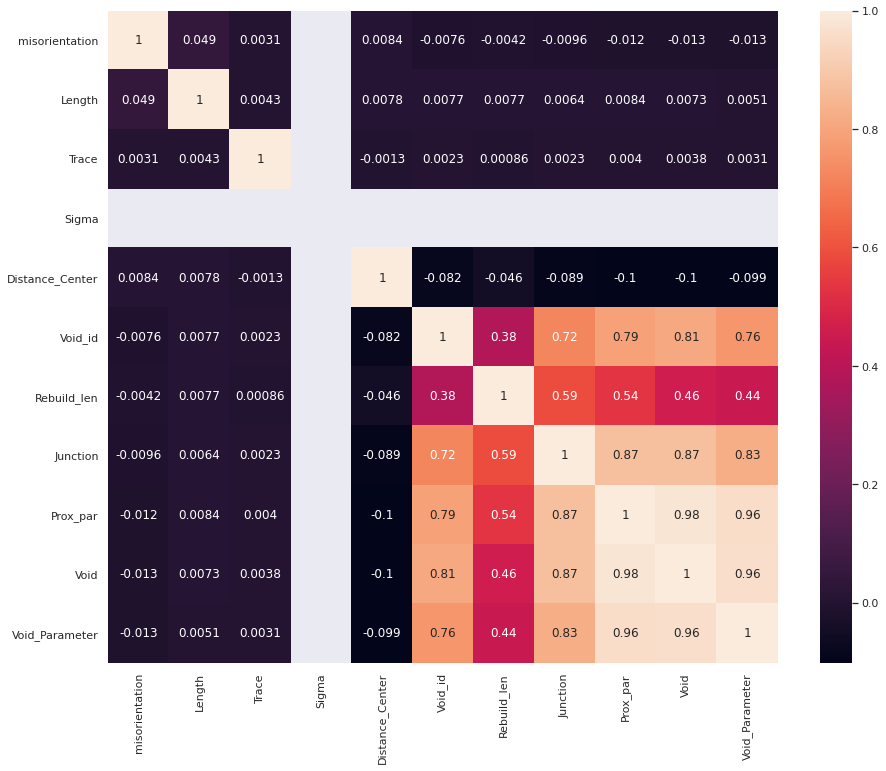

In [9]:
columns_drop=['x_start', 'y_start', 'x_end','y_end','gbID_right', 'gbID_left','Void_id']
# Drop ID grain form the dataset
df_all=df_all.drop(columns_drop, axis=1)
sns.set(rc={'figure.figsize':(15,12)})
corrMatrix = df_all.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df_all.groupby('Void').mean()

In [ ]:
columns_drop1=['phi1_right','PHI_right','phi2_right','phi1_left','PHI_left','phi2_left', 
               'mis_x_right','mis_y_right','mis_z_right','mis_x_left','mis_y_left','mis_z_left']

# Drop ID grain form the dataset
df_all=df_all.drop(columns_drop1, axis=1)
sns.set(rc={'figure.figsize':(15,12)})
corrMatrix = void_dataset.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [10]:
df_all.describe()

,misorientation,Length,Trace,Sigma,Distance_Center,Void_id,Rebuild_len,Junction,Prox_par,Void,Void_Parameter
count,193219.000000,193219.000000,193219.000000,193219.0,193219.000000,193219.000000,193219.000000,193219.000000,193219.000000,193219.000000,193219.000000
mean,38.970197,15.822664,94.643708,0.0,200.053157,-0.887640,-0.968427,-0.977093,-0.985035,0.011831,0.009807
std,13.736597,11.388032,56.006554,0.0,202.458658,1.266064,0.626101,0.239452,0.139569,0.108126,0.092970
min,0.420000,1.155000,0.400000,0.0,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,29.410000,7.024000,41.900000,0.0,91.077445,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
50%,41.210000,13.614000,94.300000,0.0,150.940538,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
75%,49.880000,22.030000,150.000000,0.0,238.688226,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
max,62.670000,108.744000,180.000000,0.0,2273.456592,34.000000,43.779976,6.000000,1.602194,1.000000,1.000000


In [ ]:
# Classificator dataframe
void_cla_df=void_dataset.drop(['Void_Parameter'], axis=1)
void_cla_df.to_csv('/home/estanislao/Documents/ML_GB/GrainLearning/output/void_cla_df.csv', header=True)

#X = void_cla_df[['misorientation', 'Length', 'Trace', 'Sigma']] # Features
#y = void_cla_df.Void # Target variable

# Distance Dataframe
void_dis_df=void_dataset.drop(['Void','Void_Parameter'], axis=1)
void_dis_df.to_csv('/home/estanislao/Documents/ML_GB/GrainLearning/output/void_dis_df.csv', header=True)


# Void Parameter Dataframe
void_vp_df=void_dataset.drop(['Void'], axis=1)
void_vp_df.to_csv('/home/estanislao/Documents/ML_GB/GrainLearning/output/void_vp_df.csv', header=True)

In [ ]:
ax = void_dataset.hist(bins=12, alpha=0.5)

In [ ]:
void_dataset[void_dataset["Void"] != 0]['misorientation'].hist(density=True,bins=60, alpha=0.5)
void_dataset[void_dataset["Void"] == 0]['misorientation'].hist(density=True,bins=30, alpha=0.5)
plt.legend(["Void", "No void"],fontsize=16)
plt.title('Misorientation frequency',fontsize=16)
plt.xlabel('Misorientation angle [degrees]',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

print(df_selected['misorientation'].mean())
print(df_no['misorientation'].mean())

In [ ]:
df_no.hist(density=True,bins=60, alpha=0.5)
plt.show()

In [ ]:
df_selected.hist(density=True,bins=60, alpha=0.5)
plt.show()

In [ ]:
df_selected['Junction'].hist(density=True,bins=40, alpha=0.7)
plt.title('Selected Junction frequency',fontsize=16)
plt.xlabel('Juntion',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
void_dataset[void_dataset["Void"] != 0]['Sigma'].hist(density=True,bins=60, alpha=0.5)
void_dataset[void_dataset["Void"] == 0]['Sigma'].hist(density=True,bins=60, alpha=0.5)
plt.legend(["Void", "No void"],fontsize=16)
plt.title('Sigma frequency',fontsize=16)
plt.xlabel('Sigma value',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

print(df_selected['Sigma'].mean())
print(df_no['Sigma'].mean())

In [ ]:
void_dataset[void_dataset["Void"] != 0]['Length'].hist(density=True,bins=40, alpha=0.5)
void_dataset[void_dataset["Void"] == 0]['Length'].hist(density=True,bins=40, alpha=0.5)
plt.legend(["Void", "No void"])
plt.title('Lentgh frequency')
plt.xlabel('Grain boundary lentgh [microns]')
plt.show()

print(df_selected['Length'].mean())
print(df_no['Length'].mean())

In [ ]:
void_dataset[void_dataset["Void"] != 0]['Trace'].hist(density=True,bins=30, alpha=0.5)
void_dataset[void_dataset["Void"] == 0]['Trace'].hist(density=True,bins=30, alpha=0.5)
plt.legend(["Void", "No void"])
plt.title('Trace angle frequency')
plt.xlabel('trace angle [degrees]')
plt.show()

print(df_selected['Trace'].mean())
print(df_no['Trace'].mean())

In [ ]:
void_dataset[void_dataset["Void"] != 0]['Sigma'].hist(density=True,bins=30, alpha=0.5)
void_dataset[void_dataset["Void"] == 0]['Sigma'].hist(density=True,bins=30, alpha=0.5)
plt.legend(["Selected", "No void"])
plt.title('Sigma Value frequency')
plt.xlabel('sigma value')
plt.show()

print(df_selected['Sigma'].mean())
print(df_no['Sigma'].mean())

In [ ]:
void_dataset[void_dataset["Void"] != 0]['Distance_Center'].hist(density=True,bins=30, alpha=0.5)
plt.legend(["Selected", "No void"])
plt.title('Distance from the center void frequency')
plt.xlabel('distance [microns]')
plt.show()

In [ ]:
void_dataset[void_dataset["Void"] != 0]['Void_Parameter'].hist(density=True,bins=10, alpha=0.5)
plt.legend(["Selected", "No void"])
plt.title('Void ranked frequency')
plt.show()

In [ ]:
df_selected['misorientation'].hist(density=True,bins=40, alpha=0.5)
plt.title('misorientation frequency',fontsize=16)
plt.xlabel('misorientation angle',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

print(df_selected['misorientation'].mean())
print(df_no['misorientation'].mean())

In [ ]:
df_selected['Trace'].hist(density=True,bins=40, alpha=0.5)
plt.title('Trace frequency',fontsize=16)
plt.xlabel('trace angle',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

print(df_selected['Trace'].mean())
print(df_no['Trace'].mean())

In [ ]:
groups = void_dataset.groupby("Void")
for name, group in groups:
    plt.plot(group["Trace"], group["Length"], marker="o", linestyle="", label=name)
plt.legend()

In [ ]:
sns_plot = sns.pairplot(void_dataset, hue='Void', size=2.5)

In [ ]:
## FROM DATACAMP PROJECT APPS - PRINT A LINE ON THE AVG AND THE NUMBER OF THE OTHERS

# Average rating of apps
avg_app_rating = void_dataset['Sigma'].mean()
print('Average sigma rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = void_dataset['Sigma']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

# ----------- INTRESTING PLOTs ----------------- LOOK MORE PLOTS IN THIS DATACAMP PROJECT

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind='hex')

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']=='Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

In [ ]:
# Void Parameter
sns.set(rc={'figure.figsize':(11.7,8.27)},)
plt.title('Void Parameter')
sns.distplot(selected_void_dataset[['Void Parameter']],bins=30);

In [ ]:
selected_void_dataset.loc[selected_void_dataset['Void Parameter']!=-1]

In [ ]:
# Void Parameter - Dropping -1 Values
red_selected_void_dataset=selected_void_dataset.loc[selected_void_dataset['Void Parameter'] != -1.0]
sns.set(rc={'figure.figsize':(11.7,8.27)},)
plt.title('Void Parameter')
sns.distplot(red_selected_void_dataset[['Void Parameter']],bins=30);

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)},)
plt.title('Sigma value')
sns.distplot(selected_void_dataset[['Void Parameter Value']],bins=30, label="Void Grain Boundary");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Trace angle', bbox_inches='tight')

In [ ]:
selected_void_dataset=void_dataset.loc[void_dataset['Void'] == 1.0]
selected_novoid_dataset=void_dataset.loc[void_dataset['Void'] == 0.0]

# Drop Void feature form the selected dataset
selected_void_dataset=selected_void_dataset.drop(['Void'], axis=1)
selected_novoid_dataset=selected_novoid_dataset.drop(['Void'], axis=1)

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)},)
plt.title('Sigma value')
sns.distplot(selected_void_dataset[['Sigma Value']],bins=30, label="Void Grain Boundary");
sns.distplot(selected_novoid_dataset[['Sigma Value']], hist=False, label="No Void Grain Boundary");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Trace angle', bbox_inches='tight')

In [ ]:
void_dataset.groupby('Void').mean()

In [ ]:
from matplotlib.ticker import FormatStrFormatter

data = selected_void_dataset
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data, facecolor='yellow', edgecolor='gray')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
twentyfifth, seventyfifth = np.percentile(data, [25, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('green')
    elif leftside > seventyfifth:
        patch.set_facecolor('red')

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.show()

In [ ]:
sigma=void_dataset['Sigma Value']
miso=void_dataset['Misorientation Angle']

In [ ]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = miso

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = sigma
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Misorientation Angle')
plt.ylabel('Sigma Value')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()


In [ ]:
void_dataset.plot(y=['Void Parameter'])
plt.show()

In [ ]:
selected_void_dataset['Mid point'] = (df_obj['Marks'] / df_obj['Total']) * 100

In [ ]:
centers, radii, vheight, voidimage, drawing = vd.findvoid(pa_pic, name, maxarea)
selected = sel.selgb(gbdata, centers, radii)